# Test basic Tensorflow features to adjust a sparse linear model

## Packages import

In [1]:
# import required libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

## Data import

In [2]:
from sklearn import datasets
from sklearn import preprocessing

# diabetes = [(Sepal Length, Sepal Width, Petal Length, Petal Width)]
diabetes = datasets.load_diabetes()
data_X = preprocessing.scale(diabetes.data)
data_y = preprocessing.scale(diabetes.target)
n = int(data_X.shape[0])
p = int(data_X.shape[1])

## Tensorflow model initialization

In [3]:
# Initialize graph
session = tf.Session()

# Initialize placeholders
X = tf.placeholder(shape = [None, p], dtype = tf.float32)
y = tf.placeholder(shape = [None]   , dtype = tf.float32)

# Create parameters of linear regression
beta = tf.Variable(tf.zeros(shape=[p, 1]))

# loss function
penalty_tuning = tf.constant(0.01/n)
l1_penalty = tf.multiply(tf.reduce_sum(tf.abs(beta)), penalty_tuning)
l2_loss  = tf.reduce_mean(tf.square(y - tf.matmul(X, beta)))
lasso_loss = tf.add(l2_loss, l1_penalty)

In [4]:
# Use stochastic gradient with constant step 
optimizer = tf.train.ProximalGradientDescentOptimizer(0.001, )

# on step of training minimizes the l2 loss
train_step = optimizer.minimize(lasso_loss)

In [5]:
max_iter = int(1e4)
threshold = 1e-3

## Initialize Tensorflow optimizer
init = tf.global_variables_initializer()
session.run(init)

In [6]:
loss_vec = []
for i in range(max_iter):
    session.run(train_step,  feed_dict = {X: data_X, y: data_y})
    loss_ = session.run(lasso_loss,  feed_dict = {X: data_X, y: data_y})
    loss_vec.append(loss_)
    if (i+1)%10==0:
        print('Step #' + str(i + 1), 'Loss = ' + str(loss_))        
    if (i > 0):
        if(np.abs(loss_vec[i]-loss_vec[i-1])) < threshold:
            break

In [7]:
# Get the optimal coefficients
print(session.run(beta))

[[-2.2624436e-08]
 [-2.2624436e-08]
 [-2.2624436e-08]
 [-2.2624436e-08]
 [-2.2624436e-08]
 [ 2.2624436e-08]
 [ 2.2624436e-08]
 [ 2.2624436e-08]
 [ 2.2624436e-08]
 [-2.2624436e-08]]


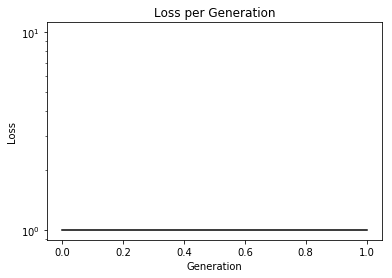

In [8]:
# Plot loss over time
plt.semilogy(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()